<a href="https://colab.research.google.com/github/Huwalli/PLta/blob/main/%E5%9C%96%E5%83%8F%E8%AD%98%E5%88%A5%E5%85%A5%E9%96%80_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  載入模型、訓練模型

In [27]:

# 導入必要的套件
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# 載入 MNIST 資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()


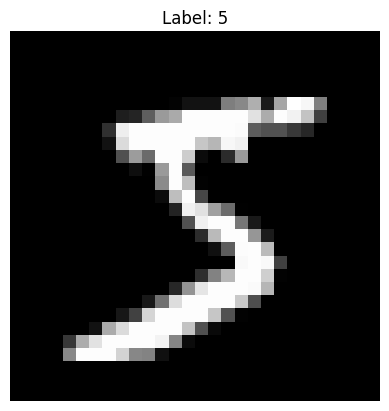

In [10]:
# 顯示單張圖像
plt.imshow(x_train[0], cmap='gray')  # 顯示訓練資料中的第 0 張圖片，使用灰階顏色顯示
plt.title(f'Label: {y_train[0]}')    # 設定圖片標題，顯示這張圖對應的標籤（類別）
plt.axis('off')                      # 隱藏座標軸（讓圖片顯示更乾淨）
plt.show()                           # 顯示圖片


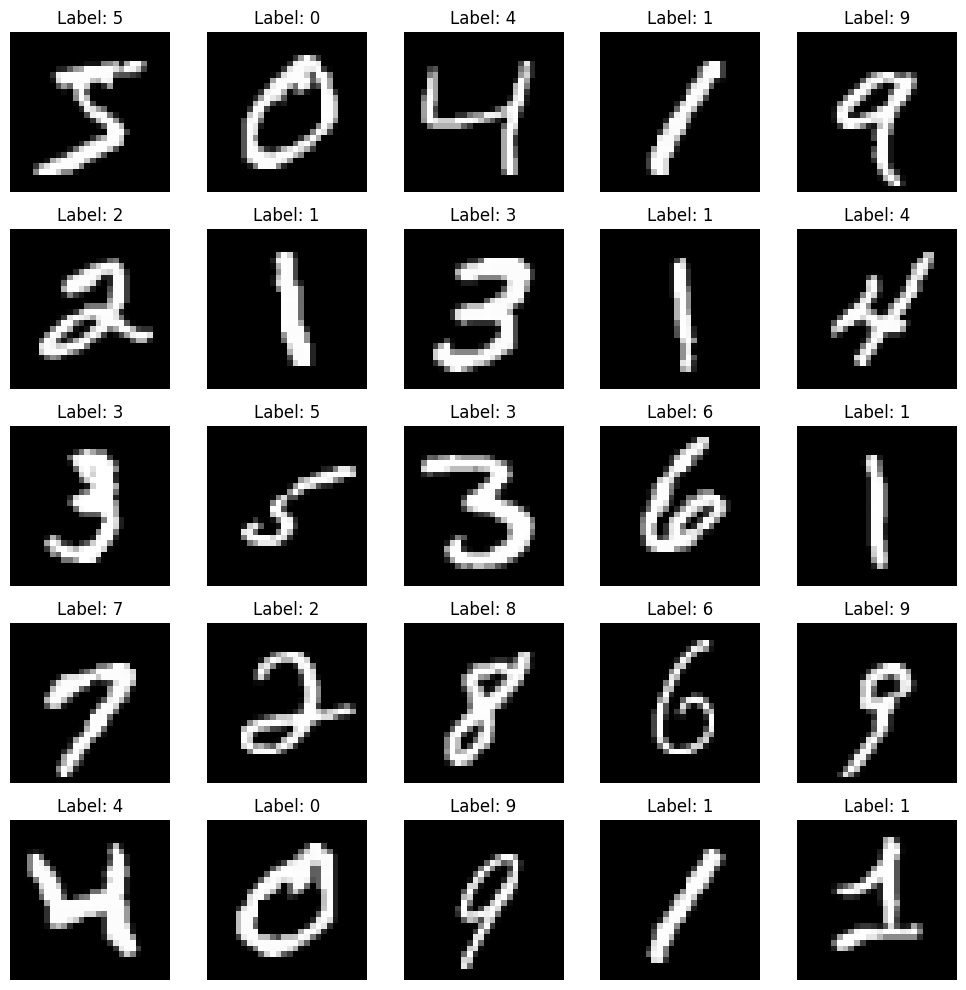

In [11]:
# 顯示多張圖像

plt.figure(figsize=(10, 10))         # 建立一個圖像區域，並設置整體大小為 10x10 英吋
for i in range(25):             # 依序顯示前 25 張訓練圖像
    plt.subplot(5, 5, i + 1)      # 建立 5x5 的子圖排列，在第 i+1 個位置插入圖像
    plt.imshow(x_train[i], cmap='gray')  # 顯示第 i 張圖像，使用灰階顯示
    plt.title(f'Label: {y_train[i]}')   # 設定該子圖的標題為對應的標籤
    plt.axis('off')             # 隱藏座標軸
plt.tight_layout()               # 自動調整所有子圖之間的間距，避免標題重疊
plt.show()                   # 顯示整個圖像區域



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7773 - loss: 0.7030 - val_accuracy: 0.9573 - val_loss: 0.1407
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9492 - loss: 0.1730 - val_accuracy: 0.9703 - val_loss: 0.1013
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9621 - loss: 0.1262 - val_accuracy: 0.9748 - val_loss: 0.0839
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9691 - loss: 0.1020 - val_accuracy: 0.9766 - val_loss: 0.0735
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9741 - loss: 0.0850 - val_accuracy: 0.9770 - val_loss: 0.0776
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9762 - loss: 0.0761 - val_accuracy: 0.9788 - val_loss: 0.0730
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9782 - loss: 0.0698 - val_accuracy: 0.9803 - val_loss: 0.0639
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9796 - loss: 0.0628 - val_accuracy: 0.

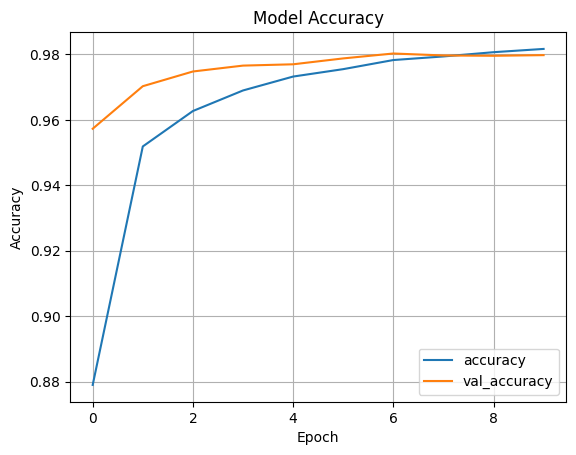

In [28]:
# 匯入必要套件
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# 載入 MNIST 資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 正規化：將像素值從 0~255 轉為 0~1
x_train, x_test = x_train / 255.0, x_test / 255.0

# 將標籤轉為 one-hot 編碼
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 建立強化版模型
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 分成 10 類
])

# 編譯模型
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 訓練模型
history = model.fit(
    x_train, y_train_cat,
    epochs=10,           # 增加訓練輪數
    batch_size=128,      # 批次大小
    validation_data=(x_test, y_test_cat)
)

# 繪製訓練過程的準確率曲線
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 儲存模型
model.save('my_model.keras')



# 輸入我們自己的圖片來測試模型準確度

In [29]:
from google.colab import files
uploaded = files.upload()


In [14]:
# 導入必要的套件

import numpy as np  # 匯入 NumPy，用於數值運算與陣列操作
import matplotlib.pyplot as plt  # 匯入 Matplotlib 的 pyplot 模組，用於繪圖
from tensorflow.keras.preprocessing import image  # 匯入 Keras 的影像前處理工具
from tensorflow.keras.models import load_model    # 匯入 Keras 的模型載入函式

# 載入已存儲的模型
model = load_model('my_model.keras')  # 從檔案 'my_model.keras' 載入已訓練好的模型



# 預處理圖像-成果

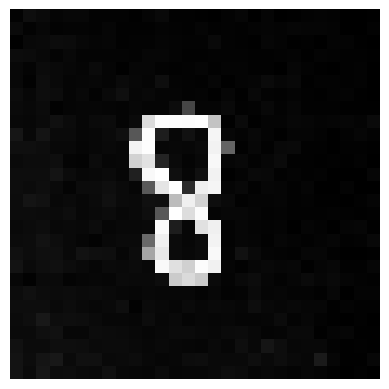

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
8.jpeg 模型預測的數字是: 8


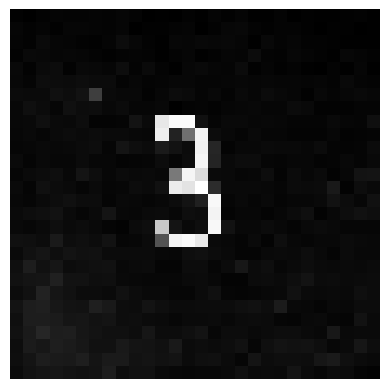

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3.jpeg 模型預測的數字是: 3


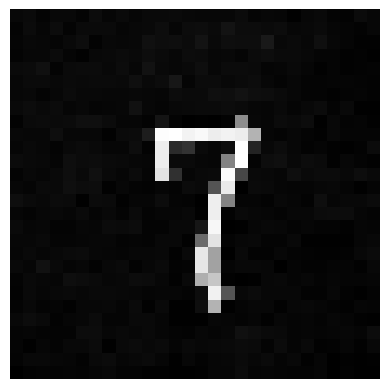

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7.jpeg 模型預測的數字是: 7


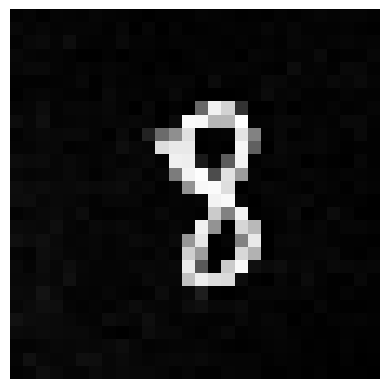

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8-1.jpeg 模型預測的數字是: 9


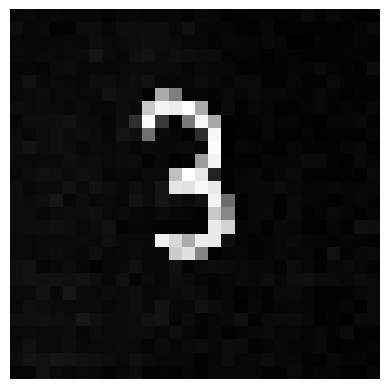

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3-1.jpeg 模型預測的數字是: 7


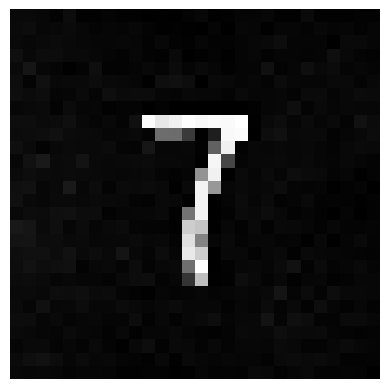

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7-1.jpeg 模型預測的數字是: 7


In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 把圖片列出
pic_st = ['8.jpeg','3.jpeg', '7.jpeg', '8-1.jpeg','3-1.jpeg', '7-1.jpeg']

for img_path in pic_st:
  img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
  img_array = image.img_to_array(img)

  # 反轉顏色（因 MNIST 是黑底白字）
  img_array = 255 - img_array

  # 顯示圖片
  plt.imshow(img_array.squeeze(), cmap='gray')
  plt.axis('off')
  plt.show()

  # 標準化
  img_array = img_array / 255.0

  # 擴張維度以符合模型需求
  img_array = np.expand_dims(img_array, axis=0)

  # 預測
  predictions = model.predict(img_array)
  predicted_label = np.argmax(predictions)
  print(f'{img_path} 模型預測的數字是: {predicted_label}')


可以發現準確度算高，但還是會有預測錯的地方

# 定一下方格的位置

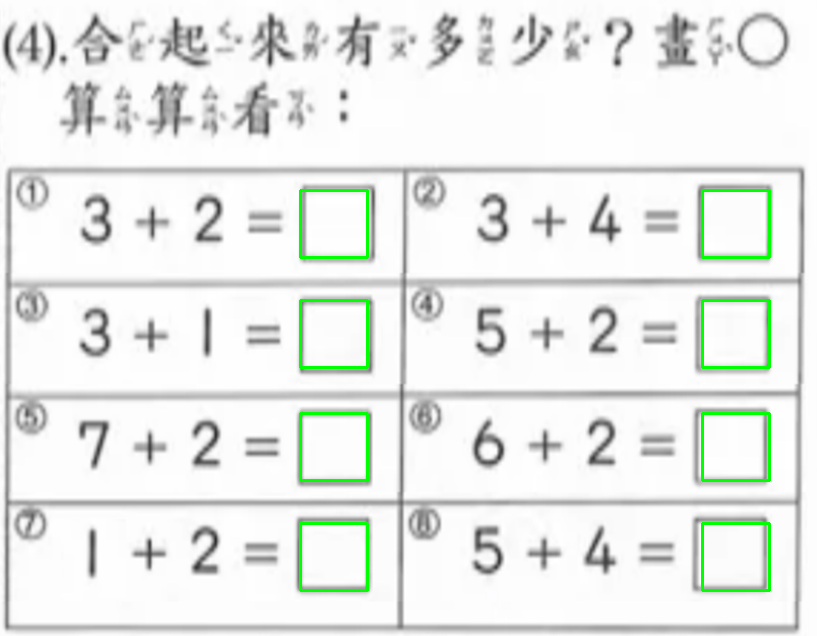

In [21]:
import cv2                 # 匯入 OpenCV 函式庫，用來處理圖像
import numpy as np         # 匯入 NumPy，用於數值運算（這段目前未用到）

from google.colab.patches import cv2_imshow  # 匯入 Colab 版本的 imshow，用於顯示圖片

# 讀取圖片，檔名是 '07126.jpg'
img = cv2.imread('07126.jpg')

# 定義方格的尺寸
width, height = 67, 67  # 每個框框的寬與高（像素）

# 定義 8 個方格左上角的位置（x, y）
grid = [[300, 190],[702, 190],
        [300, 300],[702, 300],
        [300, 413],[702, 413],
        [300, 523],[702, 523]]

# 對每個方格座標進行處理
for rec in grid:
    x, y = rec  # 將左上角座標拆為 x 和 y
    # 繪製綠色方框：從 (x, y) 到 (x+width, y+height)，框線寬度為 2 像素
    cv2.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)

# 顯示圖片（cv2.imshow 在 Colab 中無法使用，所以改用 cv2_imshow）
cv2_imshow(img)


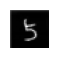

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
模型預測的數字是: 5


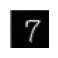

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
模型預測的數字是: 7


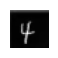

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
模型預測的數字是: 6


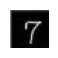

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
模型預測的數字是: 7


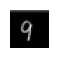

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
模型預測的數字是: 6


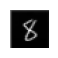

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
模型預測的數字是: 8


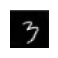

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
模型預測的數字是: 8


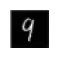

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
模型預測的數字是: 9
圖片答案： [5, 7, 4, 7, 9, 8, 3, 9]
辦識結果： [np.int64(5), np.int64(7), np.int64(6), np.int64(7), np.int64(6), np.int64(8), np.int64(8), np.int64(9)]
考卷正解： [5, 7, 4, 7, 9, 8, 3, 9]
辦識正確率：62.50%
考卷得分：62.50%
若辦識正確應得分：100.00%


In [35]:
# 匯入需要用到的套件
import cv2                     # 影像處理用
import numpy as np             # 數值處理用（例如矩陣）
from keras.preprocessing import image  # 將影像轉成模型可讀格式
from keras.models import load_model    # 載入已訓練好的模型
import matplotlib.pyplot as plt        # 畫圖用（這裡用來顯示數字圖像）

# 載入已經訓練好的模型
model = load_model('my_model.keras')  # ← 請確認檔名與你儲存的模型一致

# 定義一個函式 recognit，幫忙辨識單一數字影像
def recognit(img):
    img_array = image.img_to_array(img)        # 把影像轉為數值陣列
    img_array = img_array / 255.0              # 標準化，把像素從 0~255 變成 0~1
    img_array = np.expand_dims(img_array, axis=0)  # 增加一個「批次」維度，模型需要這樣的格式
    predictions = model.predict(img_array)     # 丟進模型，得到預測結果
    predicted_label = np.argmax(predictions)   # 找出預測結果中機率最高的那個數字
    print(f'模型預測的數字是: {predicted_label}')
    return predicted_label                     # 傳回預測數字

# 選擇要辨識的圖檔（例如學生的答案影像）
img_name = 'answer.jpg'  # ← 這裡可以改成別的圖片檔名
img = cv2.imread(img_name)  # 讀進圖片

# 預先定義人工標註的答案（實際圖片上是什麼數字）
label_1 = [5,7,4,7,9,8,3,9]  # 對應 'answer.jpg'
label_2 = [1,7,4,7,7,7,9,6]  # 可對應其他圖片
label = label_1 if img_name == 'answer.jpg' else label_2  # 根據圖片檔名選擇標註答案

# 標準答案（真正考卷該有的答案，用來算分）
ans = [5,7,4,7,9,8,3,9]
reced = []  # 用來儲存模型辨識出來的每個數字

# 每個數字方格的位置（左上角座標），以及每格是 60x60 大小
width, height = 60, 60
grid = [[305, 190],[702, 190],
        [305, 300],[702, 300],
        [305, 413],[702, 413],
        [305, 523],[702, 523]]

# 用 for 迴圈，一格一格處理每個數字的圖片
for idx, rec in enumerate(grid):
    x, y = rec  # 取得這格的左上角座標
    cropped_img = img[y:y+height, x:x+width]  # 擷取出這格影像
    gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)  # 轉成灰階（黑白）影像
    resized_img = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)  # 縮放成 28x28（模型吃這個大小）

    # 如果背景太亮，把白底黑字變成黑底白字
    if np.mean(resized_img) > 127:
        resized_img = cv2.bitwise_not(resized_img)

    # 顯示這格處理後的數字圖像
    plt.figure(figsize=(0.5, 0.5))
    plt.imshow(resized_img, cmap='gray')  # 畫成灰階圖
    plt.axis('off')  # 不顯示座標軸
    plt.show()

    # 辨識數字，把結果存進 reced 陣列
    p = recognit(resized_img)
    reced.append(p)

# 顯示人工標註答案、模型預測結果與考卷正解
print('圖片答案：', label)
print('辦識結果：', reced)
print('考卷正解：', ans)

# 計算辨識正確率：模型預測結果 vs 圖片上的數字（人工標註）
matches = sum(x == y for x, y in zip(label, reced))  # 比對每個數字，統計有幾個對
accuracy = matches / len(reced)                      # 除以總數，算出正確率
print(f"辦識正確率：{accuracy*100:.2f}%")

# 計算考試得分：模型預測結果 vs 考卷正解（答對幾題）
matches = sum(x == y for x, y in zip(ans, reced))
accuracy = matches / len(reced)
print(f"考卷得分：{accuracy*100:.2f}%")

# 理論最高分：假設模型預測完全正確，但人工標註可能錯，計算應該拿到的分數
matches = sum(x == y for x, y in zip(ans, label))
accuracy = matches / len(reced)
print(f"若辦識正確應得分：{accuracy*100:.2f}%")
